In [247]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
import os

os.chdir('/content/drive/MyDrive/Work/Cemex/DL_Tasks/02-Irs_Model')

Import important libraries


In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import shutil
%matplotlib inline

#plotly
import plotly.graph_objects as go
import plotly.express as px

# import tensorflow.compat.v1 as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

# **1.Data**

1.1 Loading and cleaning the data

Read the CSV file `train.csv` into the dataframe



In [250]:
#Read the csv file
Iris_data = pd.read_csv('IRIS.csv')

#Display your dataframe below to check it was created properly.
Iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1.2 See the data to make sure it is clean and ready for training

In [251]:
#For reference, lets get the summaries of all quantative columns
Iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [252]:
# And lets get the summaries of all qualitative columns
Iris_data.describe(include = ['O'])

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [253]:
#Check if there is any nan values in our dataset
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [254]:
#View the statistical summary of variables¶
Iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


1.3 Visualizing our dataset to determine if it needs preprocessing before training or not

In [255]:
fig = px.bar(Iris_data, x="species",barmode="group",pattern_shape_sequence=["x"])
fig.show()

1. Effect of sepal_length, sepal_width, petal_length and petal_width

Let's look at the effect of sepal_length, sepal_width, petal_length and petal_width on species.  Create three new dataframes, one containing only Iris-setosa, one containing only Iris-versicolor and one containing only Iris-virginica.

In [256]:
Iris_setosa = Iris_data.loc[Iris_data['species'] == 'Iris-setosa']
Iris_versicolor = Iris_data.loc[Iris_data['species'] == 'Iris-versicolor']
Iris_evirginica = Iris_data.loc[Iris_data['species'] == 'Iris-virginica']



Scatter plot
To determine the relationship, dispersion and normality of the previous features

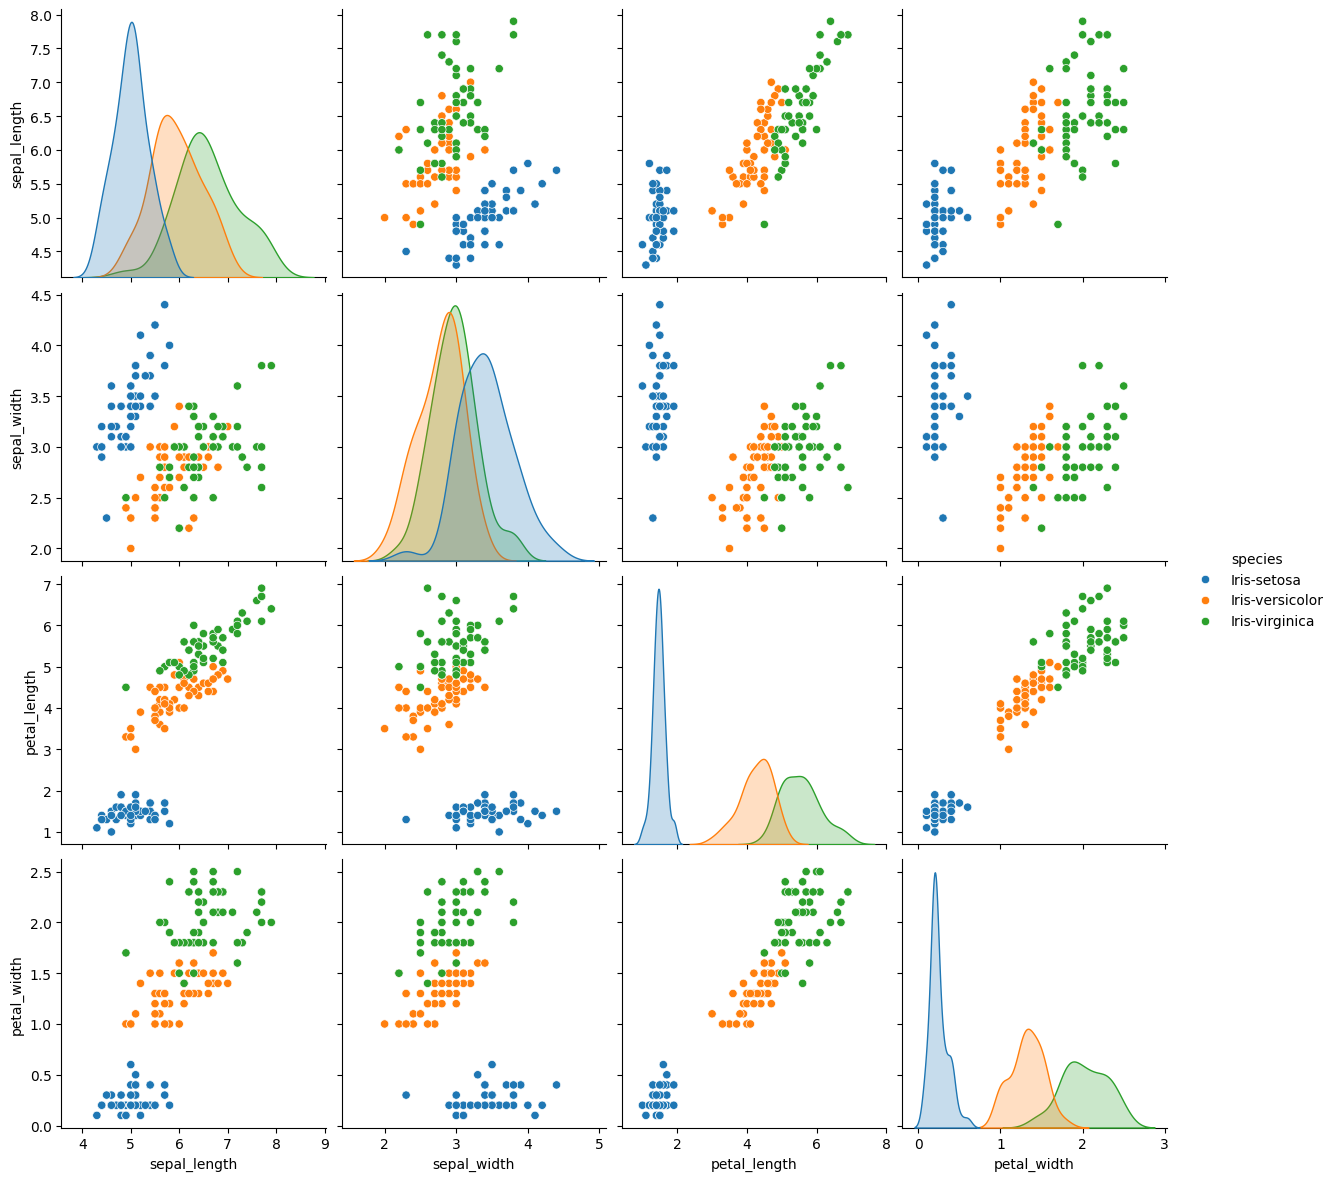

In [257]:
# sns.set_style("whitegrid")
sns.pairplot(Iris_data, hue="species", height=3)
plt.show()

Distribution plots

Create a FacetGrid for each feature


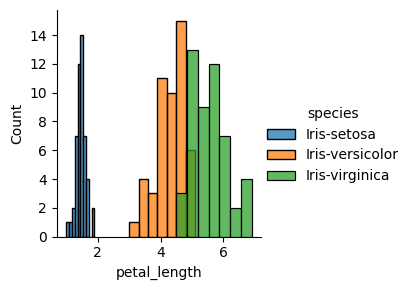

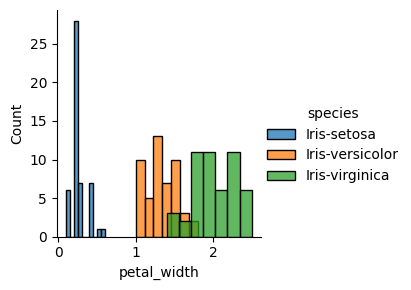

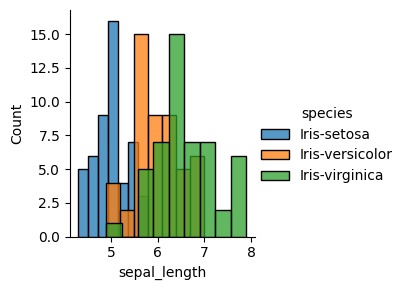

In [258]:
g1 = sns.FacetGrid(Iris_data, hue="species", height=3)
g1.map(sns.histplot, "petal_length")
g1.add_legend()

g2 = sns.FacetGrid(Iris_data, hue="species", height=3)
g2.map(sns.histplot, "petal_width")
g2.add_legend()

g3 = sns.FacetGrid(Iris_data, hue="species", height=3)
g3.map(sns.histplot, "sepal_length")
g3.add_legend()

# Show the plots
plt.show()

Boxplot

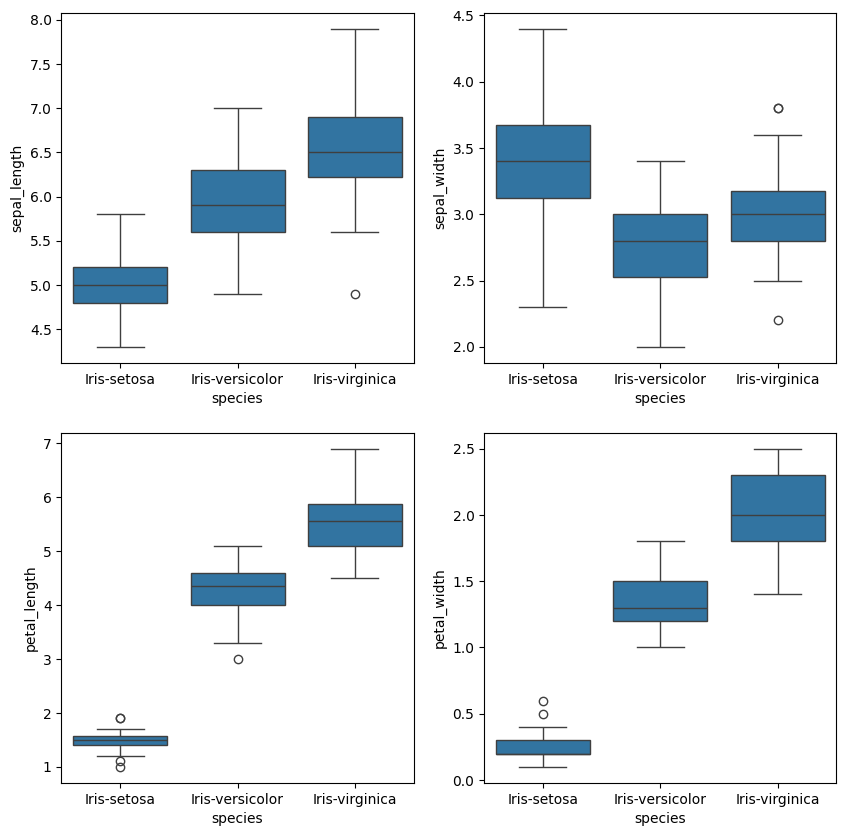

In [259]:
def graph(y):
    sns.boxplot(x="species", y=y, data=Iris_data)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

Corrolation

In [260]:
# corrMatrix = iris.corr()
corrMatrix = Iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
corrMatrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [261]:
#Converting our Species into 3 classes 0,1 and 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Iris_data['species'] = le.fit_transform(Iris_data['species'])
Iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [262]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [263]:
#determine X-features and Y-labels
X = Iris_data.drop(columns=['species'])
labels = Iris_data['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scale the input features

Standarize the inputs

In [264]:
from sklearn import preprocessing
scaled_inputs = preprocessing.scale(X)

Shuffle the data

In [265]:
shuffed_index= np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffed_index)

shuffled_inputs = scaled_inputs[shuffed_index]
shuffled_labels = labels[shuffed_index]

Split the dataset into train, validation and test

In [266]:
data_size = shuffled_inputs.shape[0]


#Splitting our data into 80% train   and    20% test
X_train, X_test, y_train, y_test = train_test_split(shuffled_inputs,shuffled_labels,test_size=0.1,random_state=1,shuffle=False)
#splitting our trainset into  90% train   and 10% validate
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=0.1,random_state=1,shuffle=False)

train_size = len(X_train)
validation_size = len(X_validate)
test_size = len(X_test)
total_data = len(shuffled_inputs)

#re-check for balance data
#print(f"train data {train_size} with {(train_size*100)/(total_data)}%"})
print(f"train data      {train_size}          {train_size*100/total_data} %")
print(f"test data       {test_size}           {test_size*100/total_data} %")
print(f"validate data   {validation_size}     {validation_size*100/total_data} %")


train data      121          80.66666666666667 %
test data       15           10.0 %
validate data   14     9.333333333333334 %


In [267]:
#Check if the sets are balance or not
class_1_train=y_train.value_counts()[0]
class_2_train=y_train.value_counts()[1]
class_3_train=y_train.value_counts()[2]

class_1_validate=y_validate.value_counts()[0]
class_2_validate=y_validate.value_counts()[1]
class_3_validate=y_validate.value_counts()[2]

class_1_test=y_test.value_counts()[0]
class_2_test=y_test.value_counts()[1]
class_3_test=y_test.value_counts()[2]

print("For The Train Set : ")
print(f"{class_1_train}   {class_2_train}   {class_3_train}")
print("For The Validate Set : ")
print(f"{class_1_validate}   {class_2_validate}   {class_3_validate}")
print("For The Test Set : ")
print(f"{class_1_test}   {class_2_test}   {class_3_test}")


For The Train Set : 
40   41   40
For The Validate Set : 
6   4   4
For The Test Set : 
4   5   6


Save the dataset into npz formate to easy load them

In [268]:
np.savez('Irs_data_train',inputs=X_train,targets=y_train)
np.savez('Irs_data_validate',inputs=X_validate,targets=y_validate)
np.savez('Irs_data_test',inputs=X_test,targets=y_test)

**2. Model**

2.1 Model Building

In [269]:
from tensorflow import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [270]:
#Number of inputs layer is equal to number of features
input_size = 4
#Number of output layer is equal to number of targets
output_size = 3
hidden_layer_size = 100

neural_network_model = tf.keras.Sequential()
neural_network_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[-1],)))
neural_network_model.add(Dense(32, activation='relu'))
neural_network_model.add(Dense(3, activation='softmax'))

In [271]:
neural_network_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
neural_network_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                160       
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Design the earlyStopping to prevent overfitting

In [272]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)


In [273]:
history = neural_network_model.fit(X_train, y_train,
                                   epochs=200,
                                   batch_size=16,
                                   validation_data=(X_validate, y_validate),
                                   callbacks = [early_stop])

Epoch 1/200
8/8 [==============================] - 1s 34ms/step - loss: 1.0650 - accuracy: 0.3719 - val_loss: 1.0110 - val_accuracy: 0.4286
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 0.9518 - accuracy: 0.6033 - val_loss: 0.8917 - val_accuracy: 0.6429
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8593 - accuracy: 0.7686 - val_loss: 0.7897 - val_accuracy: 0.8571
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.7803 - accuracy: 0.8099 - val_loss: 0.7001 - val_accuracy: 0.8571
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7084 - accuracy: 0.8099 - val_loss: 0.6197 - val_accuracy: 0.8571
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6456 - accuracy: 0.8099 - val_loss: 0.5476 - val_accuracy: 0.8571
Epoch 7/200
8/8 [==============================] - 0s 11ms/step - loss: 0.5887 - accuracy: 0.8099 - val_loss: 0.4877 - val_accuracy: 0.8571
Epoch 8/200
8/8 [========

Plot the trian and validation accuracy

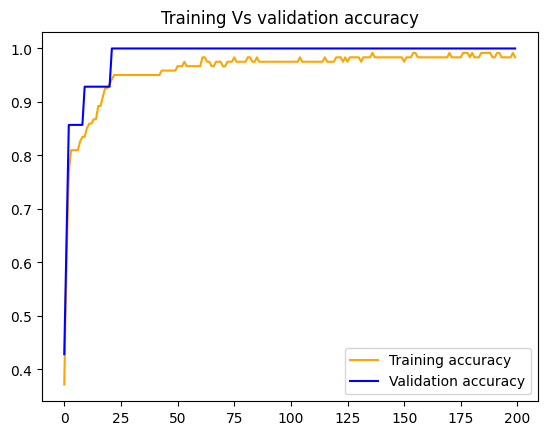

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

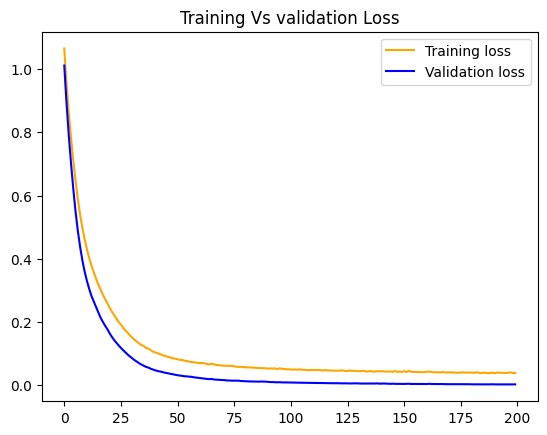

<Figure size 640x480 with 0 Axes>

In [282]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
#Printing Training_acc vs Validation acc
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training Vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#Printing Training_acc vs Validation acc
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training Vs validation Loss')
plt.legend(loc=0)
plt.figure()

4.3 Model Evaluation

In [275]:
# Evaluate the model on the test data
loss, accuracy = neural_network_model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 28ms/step - loss: 0.1939 - accuracy: 0.9333
Model accuracy on test data: 93.33%


print confusion matrix

In [276]:
predictions = neural_network_model.predict(X_test)
predictions=np.argmax(predictions,axis=-1)
print(predictions[:5])

1/1 [==============================] - 0s 75ms/step
[2 1 0 2 1]


In [277]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.94        15
weighted avg       0.94      0.93      0.93        15



Save the model

In [278]:
# Save the weights
neural_network_model.save_weights('./checkpoints/my_checkpoint')

Load the model

In [279]:
# Restore the weights
neural_network_model.load_weights('./checkpoints/my_checkpoint')

Test the model

In [280]:
npz=np.load('Irs_data_test.npz')
test_x = npz['inputs']
test_pred = npz['targets']

In [281]:
predictions = neural_network_model.predict(test_x)
predictions=np.argmax(predictions,axis=-1)
print(predictions[:5])

1/1 [==============================] - 0s 22ms/step
[2 1 0 2 1]


# XGBoost Scklearn Model

In [283]:
from xgboost import XGBClassifier


In [284]:
# create model instance
XGBoost_Model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

# fit model
XGBoost_Model.fit(X_train, y_train)
# make predictions
preds = XGBoost_Model.predict(X_test)


**Evaluating Model**

In [289]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test,preds)*100
print(f"Accuracy of the model is {accuracy}%")
print(classification_report(y_test,preds))

Accuracy of the model is 93.33333333333333%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.94        15
weighted avg       0.94      0.93      0.93        15

